In [1]:
import pandas as pd #데이터 구성
import numpy as np #행렬 연산

import matplotlib as mpl
import matplotlib.pyplot as plt #데이터 시각화
import matplotlib.font_manager as fm

mpl.rc('font', family = "AppleGothic")
mpl.rcParams['axes.unicode_minus'] = False
%matplotlib inline

import seaborn as sns

from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split #데이터 분할(test, train)
from sklearn.ensemble import GradientBoostingClassifier # Gradient Boosting
from sklearn.model_selection import GridSearchCV #최적 모델, 파라미터 탐색
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix

In [2]:
#데이터 경로는 본인의 데이터 파일 경로로 지정하셔야 합니다.
df_raw = pd.read_csv("/Users/wonho/Temp/Hustar_ICT심화트랙/dataset.csv",engine="python", encoding = "EUC-KR")
df_raw 

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2008-08-01:00:00:15,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,1133,934,적용,8,2조
1,PB562775,2008-08-01:00:00:16,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,1135,937,적용,8,2조
2,PB562776,2008-08-01:00:00:59,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,1121,889,적용,8,3조
3,PB562777,2008-08-01:00:01:24,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,1127,885,적용,8,3조
4,PB562778,2008-08-01:00:01:44,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,1128,873,적용,8,1조
5,PB562779,2008-08-01:00:02:06,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1143,127,1128,57,314,1128,874,적용,8,4조
6,PB562780,2008-08-01:00:02:28,양품,BV-EH36-TM,T8,38.33,3099,16719,15590,1호기,...,1138,126,1130,50,289,1130,878,적용,8,2조
7,PB562781,2008-08-01:00:02:21,양품,BV-EH36-TM,T8,38.33,3099,16719,15590,1호기,...,1139,126,1131,52,294,1131,870,적용,8,4조
8,PB562782,2008-08-01:00:02:51,양품,BV-EH36-TM,T8,38.33,3099,16719,15590,2호기,...,1127,126,1122,52,293,1122,873,적용,8,1조
9,PB562783,2008-08-01:00:03:15,양품,COMMON,T8,38.43,3129,16187,15280,2호기,...,1135,119,1124,73,298,1124,881,적용,8,4조


In [4]:
#결측치 확인
df_raw.isnull().sum(axis=0)

PLATE_NO             0
ROLLING_DATE         0
SCALE                0
SPEC                 0
STEEL_KIND           0
PT_THK               0
PT_WDTH              0
PT_LTH               0
PT_WGT               0
FUR_NO               0
FUR_NO_ROW           0
FUR_HZ_TEMP          0
FUR_HZ_TIME          0
FUR_SZ_TEMP          0
FUR_SZ_TIME          0
FUR_TIME             0
FUR_EXTEMP           0
ROLLING_TEMP_T5      0
HSB                  0
ROLLING_DESCALING    0
WORK_GR              0
dtype: int64

In [5]:
# 변수 제거
df_raw.drop("PLATE_NO",axis=1,inplace=True)
df_raw.drop("ROLLING_DATE",axis=1,inplace=True)
df_raw.drop("STEEL_KIND",axis=1,inplace=True)
df_raw.drop("FUR_NO_ROW",axis=1,inplace=True)
df_raw.head()

,SCALE,SPEC,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,양품,AB/EH32-TM,32.25,3707,15109,14180,1호기,1144,116,1133,59,282,1133,934,적용,8,2조
1,양품,AB/EH32-TM,32.25,3707,15109,14180,1호기,1144,122,1135,53,283,1135,937,적용,8,2조
2,양품,NV-E36-TM,33.27,3619,19181,18130,2호기,1129,116,1121,55,282,1121,889,적용,8,3조
3,양품,NV-E36-TM,33.27,3619,19181,18130,2호기,1152,125,1127,68,316,1127,885,적용,8,3조
4,양품,BV-EH36-TM,38.33,3098,13334,12430,3호기,1140,134,1128,48,314,1128,873,적용,8,1조


In [6]:
df_raw["SCALE"] = np.where(df_raw["SCALE"]=="불량",1,0)
df_raw["HSB"] = np.where(df_raw["HSB"]=="적용",1,0)

df_raw = df_raw[df_raw["HSB"] == 1]
df_raw = df_raw[df_raw["ROLLING_TEMP_T5"] > 200]

In [7]:
df_raw.reset_index(drop = True, inplace = True)
df_raw

,SCALE,SPEC,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,0,AB/EH32-TM,32.25,3707,15109,14180,1호기,1144,116,1133,59,282,1133,934,1,8,2조
1,0,AB/EH32-TM,32.25,3707,15109,14180,1호기,1144,122,1135,53,283,1135,937,1,8,2조
2,0,NV-E36-TM,33.27,3619,19181,18130,2호기,1129,116,1121,55,282,1121,889,1,8,3조
3,0,NV-E36-TM,33.27,3619,19181,18130,2호기,1152,125,1127,68,316,1127,885,1,8,3조
4,0,BV-EH36-TM,38.33,3098,13334,12430,3호기,1140,134,1128,48,314,1128,873,1,8,1조
5,0,BV-EH36-TM,38.33,3098,13334,12430,3호기,1143,127,1128,57,314,1128,874,1,8,4조
6,0,BV-EH36-TM,38.33,3099,16719,15590,1호기,1138,126,1130,50,289,1130,878,1,8,2조
7,0,BV-EH36-TM,38.33,3099,16719,15590,1호기,1139,126,1131,52,294,1131,870,1,8,4조
8,0,BV-EH36-TM,38.33,3099,16719,15590,2호기,1127,126,1122,52,293,1122,873,1,8,1조
9,0,COMMON,38.43,3129,16187,15280,2호기,1135,119,1124,73,298,1124,881,1,8,4조


In [8]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,SCALE,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,...,SPEC_PILAC-BT33,SPEC_SA283-C,SPEC_V42JBN3,FUR_NO_1호기,FUR_NO_2호기,FUR_NO_3호기,WORK_GR_1조,WORK_GR_2조,WORK_GR_3조,WORK_GR_4조
0,0,32.25,3707,15109,14180,1144,116,1133,59,282,...,0,0,0,1,0,0,0,1,0,0
1,0,32.25,3707,15109,14180,1144,122,1135,53,283,...,0,0,0,1,0,0,0,1,0,0
2,0,33.27,3619,19181,18130,1129,116,1121,55,282,...,0,0,0,0,1,0,0,0,1,0
3,0,33.27,3619,19181,18130,1152,125,1127,68,316,...,0,0,0,0,1,0,0,0,1,0
4,0,38.33,3098,13334,12430,1140,134,1128,48,314,...,0,0,0,0,0,1,1,0,0,0


In [9]:
df_raw_y = df_raw_dummy["SCALE"] #목표 변수 설정
df_raw_x = df_raw_dummy.drop("SCALE", axis = 1, inplace = False) #설명 변수 데이터 지정

In [10]:
#train_test_split : [train(0.7) : test(0.3)]
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234)

#train_test_split : [train(0.57) : valiation(0.43)]
df_train_x, df_valiation_x, df_train_y, df_valiation_y = train_test_split(df_train_x, df_train_y, test_size = 0.43, random_state = 1234)

#데이터 분할 [train(0.4) : valiation(0.3) : test(0.3)]
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("valiation data X size : {}".format(df_valiation_x.shape))
print("valiation data Y size : {}".format(df_valiation_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (271, 83)
train data Y size : (271,)
valiation data X size : (205, 83)
valiation data Y size : (205,)
test data X size : (205, 83)
test data Y size : (205,)


In [11]:
gd_uncustomized = GradientBoostingClassifier(random_state = 1234)
gd_uncustomized.fit(df_train_x, df_train_y)

print("Accuracy on training set: {:.3f}".format(gd_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(gd_uncustomized.score(df_valiation_x, df_valiation_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.985


In [12]:
gd_uncustomized

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=1234,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [13]:
train_accuracy = []; test_accuracy = []

para_n_tree = [n_tree * 10 for n_tree in range(1, 30)]

for v_n_estimators in para_n_tree:
    gd = GradientBoostingClassifier(n_estimators = v_n_estimators, random_state = 1234)
    gd.fit(df_train_x, df_train_y)
    train_accuracy.append(gd.score(df_train_x, df_train_y))
    test_accuracy.append(gd.score(df_valiation_x, df_valiation_y))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n["Estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy

In [14]:
df_accuracy_n.round(3)

,Estimators,TrainAccuracy,TestAccuracy
0,10,0.959,0.971
1,20,0.967,0.976
2,30,0.970,0.976
3,40,0.993,0.976
4,50,0.996,0.976
5,60,1.000,0.976
6,70,1.000,0.976
7,80,1.000,0.980
8,90,1.000,0.980
9,100,1.000,0.985


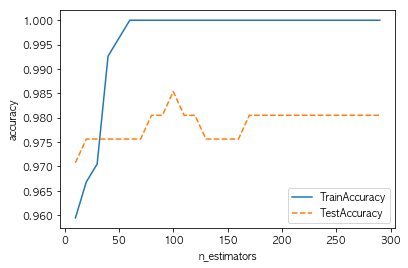

In [15]:
plt.plot(para_n_tree, train_accuracy, linestyle = "-", label = "TrainAccuracy")
plt.plot(para_n_tree, test_accuracy, linestyle = "--", label = "TestAccuracy")
plt.ylabel("accuracy"); plt.xlabel("n_estimators")
plt.legend()

In [16]:
train_accuracy = []; test_accuracy = []

para_depth = [depth for depth in range(1, 15)]

for v_max_depth in para_depth:
    gd = GradientBoostingClassifier(max_depth = v_max_depth, n_estimators = 100, random_state = 1234)
    gd.fit(df_train_x, df_train_y)
    train_accuracy.append(gd.score(df_train_x, df_train_y))
    test_accuracy.append(gd.score(df_valiation_x, df_valiation_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

In [17]:
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.967,0.966
1,2,1.000,0.966
2,3,1.000,0.985
3,4,1.000,0.985
4,5,1.000,0.985
5,6,1.000,0.980
6,7,1.000,0.985
7,8,1.000,0.985
8,9,1.000,0.966
9,10,1.000,0.941


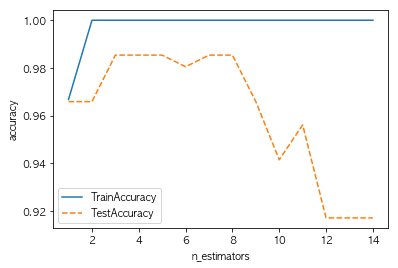

In [18]:
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "TrainAccuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "TestAccuracy")
plt.ylabel("accuracy"); plt.xlabel("n_estimators")
plt.legend()

In [19]:
train_accuracy = []; test_accuracy = []

para_split = [n_split * 2 for n_split in range(1, 41)]

for v_min_samples_split in para_split:
    gd = GradientBoostingClassifier(min_samples_split = v_min_samples_split, max_depth = 8, n_estimators = 100, learning_rate = 0.3, random_state = 1234)
    gd.fit(df_train_x, df_train_y)
    train_accuracy.append(gd.score(df_train_x, df_train_y))
    test_accuracy.append(gd.score(df_valiation_x, df_valiation_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

In [20]:
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,2,1.0,0.956
1,4,1.0,0.985
2,6,1.0,0.980
3,8,1.0,0.980
4,10,1.0,0.956
5,12,1.0,0.956
6,14,1.0,0.956
7,16,1.0,0.956
8,18,1.0,0.956
9,20,1.0,0.985


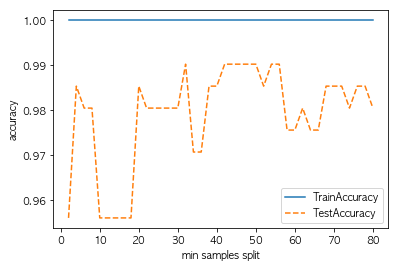

In [21]:
plt.plot(para_split, train_accuracy, linestyle = "-", label = "TrainAccuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "TestAccuracy")
plt.ylabel("accuracy"); plt.xlabel("min samples split")
plt.legend()

In [22]:
train_accuracy = []; test_accuracy = []

para_leaf = [n_leaf * 5 for n_leaf in range(1, 21)]

for v_min_samples_leaf in para_leaf:
    gd = GradientBoostingClassifier(min_samples_leaf = v_min_samples_leaf, max_depth = 8, n_estimators = 100, min_samples_split = 32, random_state = 1234)
    gd.fit(df_train_x, df_train_y)
    train_accuracy.append(gd.score(df_train_x, df_train_y))
    test_accuracy.append(gd.score(df_valiation_x, df_valiation_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

In [23]:
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,2,1.0,0.956
1,4,1.0,0.985
2,6,1.0,0.980
3,8,1.0,0.980
4,10,1.0,0.956
5,12,1.0,0.956
6,14,1.0,0.956
7,16,1.0,0.956
8,18,1.0,0.956
9,20,1.0,0.985


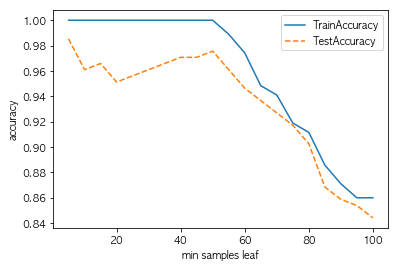

In [24]:
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "TrainAccuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "TestAccuracy")
plt.ylabel("accuracy"); plt.xlabel("min samples leaf")
plt.legend()

In [25]:
train_accuracy = []; test_accuracy = []

para_lr = [lr * 0.1 for lr in range(1, 10)]

for v_learning_rate in para_lr:
    gd = GradientBoostingClassifier(learning_rate = v_learning_rate, min_samples_leaf = 48, max_depth = 8, n_estimators = 100, min_samples_split = 32, random_state = 1234)
    gd.fit(df_train_x, df_train_y)
    train_accuracy.append(gd.score(df_train_x, df_train_y))
    test_accuracy.append(gd.score(df_valiation_x, df_valiation_y))
    
df_accuracy_lr = pd.DataFrame()
df_accuracy_lr["LearningRate"] = para_lr
df_accuracy_lr["TrainAccuracy"] = train_accuracy
df_accuracy_lr["TestAccuracy"] = test_accuracy

In [26]:
df_accuracy_lr.round(3)

,LearningRate,TrainAccuracy,TestAccuracy
0,0.1,1.0,0.966
1,0.2,1.0,0.976
2,0.3,1.0,0.976
3,0.4,1.0,0.976
4,0.5,1.0,0.976
5,0.6,1.0,0.966
6,0.7,1.0,0.971
7,0.8,1.0,0.966
8,0.9,1.0,0.956


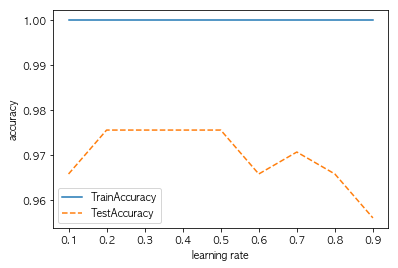

In [27]:
plt.plot(para_lr, train_accuracy, linestyle = "-", label = "TrainAccuracy")
plt.plot(para_lr, test_accuracy, linestyle = "--", label = "TestAccuracy")
plt.ylabel("accuracy"); plt.xlabel("learning rate")
plt.legend()

In [55]:
gd_final = GradientBoostingClassifier(random_state = 1234, n_estimators = 100,
                                min_samples_leaf = 55, learning_rate = 0.3,
                                max_depth = 8, min_samples_split = 32)

gd_final.fit(df_train_x, df_train_y)

y_pred = gd_final.predict(df_test_x)

print("Accuracy on training set: {:.3f}".format(gd_final.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(gd_final.score(df_test_x, df_test_y)))
print("Confusion matrix: \n {}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set: 1.000
Accuracy on test set: 0.951
Confusion matrix: 
 [[136   1]
 [  9  59]]


In [29]:
v_feature_name = df_train_x.columns

gd_importance = pd.DataFrame()
gd_importance["Feature"] = v_feature_name
gd_importance["Importance"] = gd_final.feature_importances_

gd_importance.sort_values("Importance", ascending = False, inplace = True)
gd_importance.round(3)

,Feature,Importance
10,ROLLING_TEMP_T5,0.796
0,PT_THK,0.037
7,FUR_SZ_TIME,0.037
12,ROLLING_DESCALING,0.034
2,PT_LTH,0.022
6,FUR_SZ_TEMP,0.021
8,FUR_TIME,0.018
4,FUR_HZ_TEMP,0.013
3,PT_WGT,0.009
9,FUR_EXTEMP,0.007


Text(0, 0.5, '설명변수')

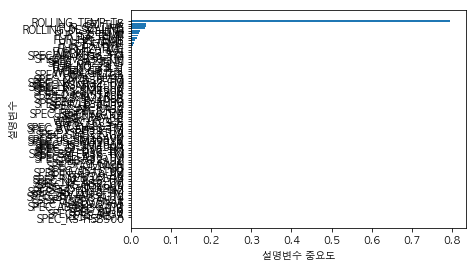

In [30]:
gd_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(gd_importance))
plt.barh(y = coordinates, width = gd_importance["Importance"])
plt.yticks(coordinates, gd_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")